In [1]:
import pandas as pd
import numpy as np

# load data (personal path, needs to be changed)
path = r"/Users/gustavetriomphe/Desktop/HEC/interpretability-stability-fairness/dataproject2025.csv"
df = pd.read_csv(path)


In [2]:
# rename index column and drop old index column
df['Index'] = df['Unnamed: 0']
df = df.drop(columns=['Unnamed: 0'])
#df.info()

In [3]:
# number of missing values
df=df.replace('nan', np.nan)
number_missing_values = df.isna().sum().sum()
df.drop(index=df[df.isna().any(axis=1)].index, inplace=True)
print(f"Number of missing values: {number_missing_values}")
# check
number_missing_values = df.isna().sum().sum()
print(f"Number of missing values after dropping rows with missing values: {number_missing_values}")

Number of missing values: 16986
Number of missing values after dropping rows with missing values: 0


In [4]:
# separate features, predicted probabilities, predictions and true labels
prob = df['Predicted probabilities']
df.drop(columns=['Predicted probabilities'], inplace=True)
predictions = df['Predictions']
df.drop(columns=['Predictions'], inplace=True)
true_labels = df['target']
df.drop(columns=['target'], inplace=True)

Taking all features into account, one hot encoding

In [5]:
categorical_features = ['sub_grade', 'purpose', 'home_ownership', 'grade', 'emp_title', 'emp_length']
for col in categorical_features:
    unique_vals = df[col].nunique()
    print(f"Number of unique values in {col}: {unique_vals}")
    # print unique values
    # print(f"Unique values in {col}: {df[col].unique()}")


Number of unique values in sub_grade: 35
Number of unique values in purpose: 13
Number of unique values in home_ownership: 3
Number of unique values in grade: 7
Number of unique values in emp_title: 51
Number of unique values in emp_length: 11


In [6]:
from src.utils import *
from src.models import *
df_oh = one_hot(df, categorical_features)
# df_oh.info()

In [7]:
# initialize and fit surrogate model
surrogate = LinearSurrogate()
surrogate.fit(df_oh, prob)

In [8]:
# get feature names
feature_names = df_oh.columns.tolist()
# get coefficients
coeff = surrogate.get_coefficients()

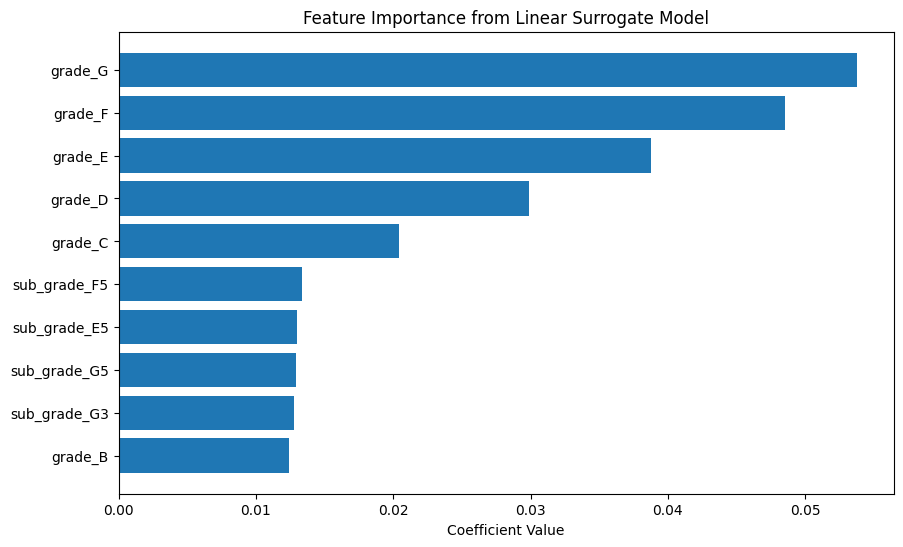

In [9]:
# plot most important features
surrogate.plot_interpretation(feature_names, max_features=10)

only taking into account numerical features

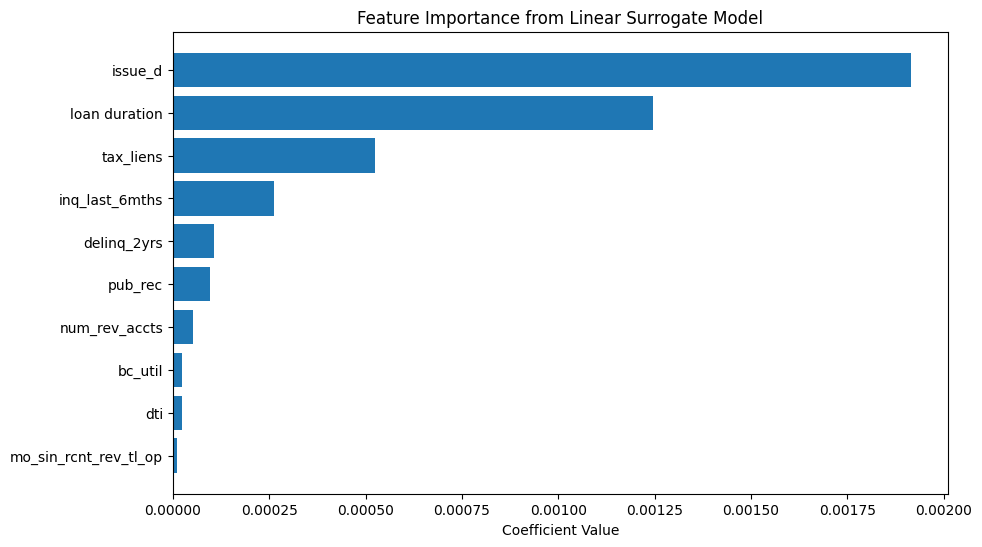

In [10]:
# only taking into account numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
df_numerical = df[numerical_features]
surrogate_numerical = LinearSurrogate()
surrogate_numerical.fit(df_numerical, prob)
feature_names_numerical = df_numerical.columns.tolist()
surrogate_numerical.plot_interpretation(feature_names_numerical, max_features=10)

Personal blackbox model

In [11]:
# train a personal rgboost model
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(df_oh, true_labels)
# predict probabilities
prob_personal = model.predict_proba(df_oh)[:, 1]

ModuleNotFoundError: No module named 'xgboost'